# 第6章　単語ベクトル

## 50. 単語ベクトルの読み込みと表示

Google Newsデータセット（約1,000億単語）での学習済み単語ベクトル（300万単語・フレーズ、300次元）をダウンロードし、”United States”の単語ベクトルを表示せよ。ただし、”United States”は内部的には”United_States”と表現されていることに注意せよ。

In [1]:
# ファイルの読み込み
!gunzip GoogleNews-vectors-negative300.bin.gz

事前学習済みの単語ベクトルを扱うとき、gensimがよく用いられると思います。 gensimはGoogle Colaboratoryにインストールされていないので、pip install gensimをコマンドとして実行し、手動でインストールする必要があります。ところが、gensimはNumPy 2.xと互換性が無いため、gensimをインストールするとNumPyのバージョンが1.xにダウングレードされます。このとき、Google Colaboratoryのランタイムを再起動する必要があるようなのですが、そのような指示が表示されません。gensimのインストールが完了したら、Google Colaboratoryのメニューバーから「ランタイム」→「セッションを再起動する」をクリックし、ランタイムを再起動してください。ランタイムを再起動した後に、pip install gensimを再実行する必要はありません。

In [2]:
!pip install gensim # gensim はトレーニング済みの単語ベクトルも出宇を　Keyed Vectors データとしてロードする

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 62.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 92.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 15.6 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.14.1
    Uninstalling scipy-1.14.1:
      Successfully uninstalled scipy-1.14.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.


In [3]:
# 50

import gensim
# gensim で使われているKeyed Vecは単語をキー都市そのベクトル表現を値とする辞書なのでロードしたモデル['キー']で単語ベクトルが取れる
# 今回はWord2vec
model = gensim.models.KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin', binary=True)
model['United_States']

array([-3.61328125e-02, -4.83398438e-02,  2.35351562e-01,  1.74804688e-01,
       -1.46484375e-01, -7.42187500e-02, -1.01562500e-01, -7.71484375e-02,
        1.09375000e-01, -5.71289062e-02, -1.48437500e-01, -6.00585938e-02,
        1.74804688e-01, -7.71484375e-02,  2.58789062e-02, -7.66601562e-02,
       -3.80859375e-02,  1.35742188e-01,  3.75976562e-02, -4.19921875e-02,
       -3.56445312e-02,  5.34667969e-02,  3.68118286e-04, -1.66992188e-01,
       -1.17187500e-01,  1.41601562e-01, -1.69921875e-01, -6.49414062e-02,
       -1.66992188e-01,  1.00585938e-01,  1.15722656e-01, -2.18750000e-01,
       -9.86328125e-02, -2.56347656e-02,  1.23046875e-01, -3.54003906e-02,
       -1.58203125e-01, -1.60156250e-01,  2.94189453e-02,  8.15429688e-02,
        6.88476562e-02,  1.87500000e-01,  6.49414062e-02,  1.15234375e-01,
       -2.27050781e-02,  3.32031250e-01, -3.27148438e-02,  1.77734375e-01,
       -2.08007812e-01,  4.54101562e-02, -1.23901367e-02,  1.19628906e-01,
        7.44628906e-03, -

## 51. 単語の類似度

“United States”と”U.S.”のコサイン類似度を計算せよ。

In [ ]:
# 51
import numpy as np

# 単語ベクトルの取得
vec1 = model['United_States']
vec2 = model['U.S.']

# コサイン類似度の計算
def  cos_sim(v1, v2):
  return np.dot(v1, v2) / (np.linalg.norm(v1) * np.linalg.norm(v2))

print(cos_sim(vec1, vec2))


0.7310775


In [ ]:
# gensim でも計算できる
model.similarity('United_States', 'U.S.')

0.73107743

## 52. 類似度の高い単語10件

“United States”とコサイン類似度が高い10語と、その類似度を出力せよ。

In [ ]:
print(model.most_similar('United_States', topn=10))

[('Unites_States', 0.7877248525619507), ('Untied_States', 0.7541370987892151), ('United_Sates', 0.7400724291801453), ('U.S.', 0.7310774326324463), ('theUnited_States', 0.6404393911361694), ('America', 0.6178410053253174), ('UnitedStates', 0.6167312264442444), ('Europe', 0.6132988929748535), ('countries', 0.6044804453849792), ('Canada', 0.601906955242157)]


## 53. 加法構成性によるアナロジー

“Spain”の単語ベクトルから”Madrid”のベクトルを引き、”Athens”のベクトルを足したベクトルを計算し、そのベクトルと類似度の高い10語とその類似度を出力せよ。

In [ ]:
vec = model['Spain'] - model['Madrid'] + model['Athens']
print(model.most_similar([vec], topn=10))

[('Athens', 0.7528455853462219), ('Greece', 0.6685472130775452), ('Aristeidis_Grigoriadis', 0.5495778322219849), ('Ioannis_Drymonakos', 0.5361457467079163), ('Greeks', 0.5351786017417908), ('Ioannis_Christou', 0.5330225825309753), ('Hrysopiyi_Devetzi', 0.5088489055633545), ('Iraklion', 0.5059264302253723), ('Greek', 0.5040615797042847), ('Athens_Greece', 0.5034108757972717)]


In [ ]:
# 別解
print(model.most_similar(positive=['Spain', 'Athens'], negative=['Madrid'], topn=10))

[('Greece', 0.6898480653762817), ('Aristeidis_Grigoriadis', 0.560684859752655), ('Ioannis_Drymonakos', 0.5552908778190613), ('Greeks', 0.545068621635437), ('Ioannis_Christou', 0.5400862097740173), ('Hrysopiyi_Devetzi', 0.5248445272445679), ('Heraklio', 0.5207759737968445), ('Athens_Greece', 0.516880989074707), ('Lithuania', 0.5166865587234497), ('Iraklion', 0.5146791338920593)]


## 54. アナロジーデータでの実験

単語アナロジーの評価データをダウンロードし、国と首都に関する事例（: capital-common-countriesセクション）に対して、vec(2列目の単語) - vec(1列目の単語) + vec(3列目の単語)を計算し、そのベクトルと類似度が最も高い単語と、その類似度を求めよ。求めた単語と類似度は、各事例と一緒に記録せよ。

In [1]:
!wget http://download.tensorflow.org/data/questions-words.txt
!head -10 questions-words.txt

--2025-04-22 04:23:54--  http://download.tensorflow.org/data/questions-words.txt
Resolving download.tensorflow.org (download.tensorflow.org)... 108.177.12.207, 108.177.11.207, 74.125.26.207, ...
Connecting to download.tensorflow.org (download.tensorflow.org)|108.177.12.207|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 603955 (590K) [text/plain]
Saving to: ‘questions-words.txt’

questions-words.txt 100%[===================>] 589.80K  --.-KB/s    in 0.004s  

2025-04-22 04:23:54 (140 MB/s) - ‘questions-words.txt’ saved [603955/603955]

: capital-common-countries
Athens Greece Baghdad Iraq
Athens Greece Bangkok Thailand
Athens Greece Beijing China
Athens Greece Berlin Germany
Athens Greece Bern Switzerland
Athens Greece Cairo Egypt
Athens Greece Canberra Australia
Athens Greece Hanoi Vietnam
Athens Greece Havana Cuba


In [ ]:
count = 1
dataset = []

with open('/content/questions-words.txt', 'r') as f1:
  for line in f1:  # f1から1行ずつ読込み
    line = line.split()
    if line[0] == ':':
      print('--------'+line[1]+'---------')
    else:
      # 508行目まで : capital-common-countries
      count += 1
      if count >= 508:
        break

      # 2番目 + 3番目 - 1番目
      word, cos = model.most_similar(positive=[line[1], line[2]], negative=[line[0]], topn=1)[0]
      print(' '.join(line + [word, str(cos)]))

      # リストに単語と類似度を保存
      dataset.append([line[0], line[1], line[2], line[3], word, cos])

--------capital-common-countries---------
Athens Greece Baghdad Iraq Iraqi 0.635187029838562
Athens Greece Bangkok Thailand Thailand 0.7137669324874878
Athens Greece Beijing China China 0.7235778570175171
Athens Greece Berlin Germany Germany 0.6734622716903687
Athens Greece Bern Switzerland Switzerland 0.4919748306274414
Athens Greece Cairo Egypt Egypt 0.7527808547019958
Athens Greece Canberra Australia Australia 0.583732545375824
Athens Greece Hanoi Vietnam Viet_Nam 0.6276341676712036
Athens Greece Havana Cuba Cuba 0.6460990905761719
Athens Greece Helsinki Finland Finland 0.68999844789505
Athens Greece Islamabad Pakistan Pakistan 0.7233326435089111
Athens Greece Kabul Afghanistan Afghan 0.6160916090011597
Athens Greece London England Britain 0.5646188259124756
Athens Greece Madrid Spain Spain 0.703661322593689
Athens Greece Moscow Russia Russia 0.7382973432540894
Athens Greece Oslo Norway Norway 0.6470744013786316
Athens Greece Ottawa Canada Canada 0.5912168622016907
Athens Greece Par

In [ ]:
# 中身の確認
dataset[:5]

[['Athens', 'Greece', 'Baghdad', 'Iraqi', 0.635187029838562],
 ['Athens', 'Greece', 'Bangkok', 'Thailand', 0.7137669324874878],
 ['Athens', 'Greece', 'Beijing', 'China', 0.7235778570175171],
 ['Athens', 'Greece', 'Berlin', 'Germany', 0.6734622716903687],
 ['Athens', 'Greece', 'Bern', 'Switzerland', 0.4919748306274414],
 ['Athens', 'Greece', 'Cairo', 'Egypt', 0.7527808547019958],
 ['Athens', 'Greece', 'Canberra', 'Australia', 0.583732545375824],
 ['Athens', 'Greece', 'Hanoi', 'Viet_Nam', 0.6276341676712036],
 ['Athens', 'Greece', 'Havana', 'Cuba', 0.6460990905761719],
 ['Athens', 'Greece', 'Helsinki', 'Finland', 0.68999844789505]]

In [ ]:
# データフレームにする
import pandas as pd
df = pd.DataFrame(dataset, columns=['word1', 'word2', 'word3', 'word4', 'pred', 'cos'])
df.head()

,word1,word2,word3,word4,pred,cos
0,Athens,Greece,Baghdad,Iraq,Iraqi,0.635187
1,Athens,Greece,Bangkok,Thailand,Thailand,0.713767
2,Athens,Greece,Beijing,China,China,0.723578
3,Athens,Greece,Berlin,Germany,Germany,0.673462
4,Athens,Greece,Bern,Switzerland,Switzerland,0.491975


## 55. アナロジータスクでの正解率

54の実行結果を用い、意味的アナロジー（semantic analogy）と文法的アナロジー（syntactic analogy）の正解率を測定せよ。

意味的アナロジー：king : queen = man : (?)

単語の意味的関係に基づいたアナロジー問題（関係性を問う問題）

文法的アナロジー：walk : walked = go : (?)

単語ん文法的関係に基づいたアナロジー問題

In [ ]:
# 54の結果をもとに意味的アナロジーでの正解率を計算
from sklearn.metrics import accuracy_score

# Accuracy を計算
accuracy = accuracy_score(df['word4'], df['pred'])

print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.83


In [4]:
# 文法的アナロジーのためにデータを作成
# : gram9-plural-verbs
# 18688-

count = 1
dataset2 = []

with open('/content/questions-words.txt', 'r') as f1:
  for i, line in enumerate(f1):  # f1から1行ずつ読込み
    # 18688行目から
    if i < 18688 - 1:
      continue

    line = line.split()

    if line[0] == ':':
      print('--------'+line[1]+'---------')
    else:

      # 2番目 + 3番目 - 1番目
      word, cos = model.most_similar(positive=[line[1], line[2]], negative=[line[0]], topn=1)[0]
      print(' '.join(line + [word, str(cos)]))

      # リストに単語と類似度を保存
      dataset2.append([line[0], line[1], line[2], line[3], word, cos])

--------gram9-plural-verbs---------
decrease decreases describe describes describing 0.5969001054763794
decrease decreases eat eats eats 0.6888679265975952
decrease decreases enhance enhances enhances 0.7360528111457825
decrease decreases estimate estimates estimates 0.7482271790504456
decrease decreases find finds finding 0.605344295501709
decrease decreases generate generates generates 0.7072463035583496
decrease decreases go goes goes 0.6656553745269775
decrease decreases implement implements implementing 0.6325476169586182
decrease decreases increase increases increases 0.8778337836265564
decrease decreases listen listens listening 0.6408544182777405
decrease decreases play plays plays 0.7042399644851685
decrease decreases predict predicts accurately_predict 0.6694682240486145
decrease decreases provide provides provides 0.6830293536186218
decrease decreases say says argue 0.5921557545661926
decrease decreases scream screams screams 0.7262051105499268
decrease decreases search sear

In [5]:
# データフレームにする
import pandas as pd
df = pd.DataFrame(dataset2, columns=['word1', 'word2', 'word3', 'word4', 'pred', 'cos'])
df.head()

,word1,word2,word3,word4,pred,cos
0,decrease,decreases,describe,describes,describing,0.596900
1,decrease,decreases,eat,eats,eats,0.688868
2,decrease,decreases,enhance,enhances,enhances,0.736053
3,decrease,decreases,estimate,estimates,estimates,0.748227
4,decrease,decreases,find,finds,finding,0.605344


In [6]:
# 文法的アナロジーでの正解率を計算
from sklearn.metrics import accuracy_score

# Accuracy を計算
accuracy = accuracy_score(df['word4'], df['pred'])

print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.68


## 56. WordSimilarity-353での評価

The WordSimilarity-353 Test Collectionの評価データをダウンロードし、単語ベクトルにより計算される類似度のランキングと、人間の類似度判定のランキングの間のスピアマン相関係数を計算せよ。

In [7]:
# データの取得
!wget http://www.gabrilovich.com/resources/data/wordsim353/wordsim353.zip
!unzip wordsim353.zip

--2025-04-22 04:34:06--  http://www.gabrilovich.com/resources/data/wordsim353/wordsim353.zip
Resolving www.gabrilovich.com (www.gabrilovich.com)... 173.236.137.139
Connecting to www.gabrilovich.com (www.gabrilovich.com)|173.236.137.139|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://gabrilovich.com/resources/data/wordsim353/wordsim353.zip [following]
--2025-04-22 04:34:06--  https://gabrilovich.com/resources/data/wordsim353/wordsim353.zip
Resolving gabrilovich.com (gabrilovich.com)... 173.236.137.139
Connecting to gabrilovich.com (gabrilovich.com)|173.236.137.139|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23257 (23K) [application/zip]
Saving to: ‘wordsim353.zip’

wordsim353.zip      100%[===================>]  22.71K  --.-KB/s    in 0.02s   

2025-04-22 04:34:07 (1.26 MB/s) - ‘wordsim353.zip’ saved [23257/23257]

Archive:  wordsim353.zip
  inflating: combined.csv            
  inflating: set1.csv          

In [8]:
# 読み込み
import pandas as pd
df = pd.read_csv('/content/combined.csv', sep=',', header=0)
df.head(5)

,Word 1,Word 2,Human (mean)
0,love,sex,6.77
1,tiger,cat,7.35
2,tiger,tiger,10.00
3,book,paper,7.46
4,computer,keyboard,7.62


In [9]:
# 単語ベクトルにより計算される類似度のランキング
# Word1, 2間の類似度を計算
# 計算結果を追加

w2v = []
for i in range(len(df)):
  w1 = df.iloc[i]['Word 1']
  w2 = df.iloc[i]['Word 2']
  w2v.append(model.similarity(w1, w2))

df['w2v'] = w2v
df.head(5)

,Word 1,Word 2,Human (mean),w2v
0,love,sex,6.77,0.263938
1,tiger,cat,7.35,0.517296
2,tiger,tiger,10.00,1.000000
3,book,paper,7.46,0.363463
4,computer,keyboard,7.62,0.396392


In [10]:
# 単語ベクトルと人間の類似度判定のランキングのスピアマン相関係数
import scipy.stats as stats

#スピアマン相関係数
print(stats.spearmanr(df['Human (mean)'], df['w2v']))

SignificanceResult(statistic=0.7000166486272194, pvalue=2.86866666051422e-53)


## 57. k-meansクラスタリング

国名に関する単語ベクトルを抽出し、k-meansクラスタリングをクラスタ数k=5として実行せよ。

In [13]:
# 国名一覧
countries = [
"United_States",
"Afghanistan",
"Albania",
"Algeria",
"Andorra",
"Angola",
#"Antigua_and_Barbuda",
"Argentina",
"Armenia",
"Australia",
"Austria",
"Azerbaijan",
"Bahamas",
"Bahrain",
"Bangladesh",
"Barbados",
"Belarus",
"Belgium",
"Belize",
"Benin",
"Bhutan",
"Bolivia",
#"Bosnia_and_Herzegovina",
"Botswana",
"Brazil",
"Brunei",
"Bulgaria",
"Burkina_Faso",
"Burundi",
"Cambodia",
"Cameroon",
"Canada",
"Cape_Verde",
#"Central_African_Republic",
"Chad",
"Chile",
"China",#"People's_Republic_of_China",
"Colombia",
"Comoros",
"Congo",#"Congo_-_Kinshasa",
#"Congo_-_Brazzaville",
"Costa_Rica",
#"Cote_d'Ivoire_(The_Ivory_Coast)",
"Croatia",
"Cuba",
"Cyprus",
"Czech_Republic",
"Denmark",
"Djibouti",
"Dominica",
"Dominican_Republic",
"Ecuador",
"Egypt",
"El_Salvador",
"Equatorial_Guinea",
"Eritrea",
"Estonia",
"Ethiopia",
"Fiji",
"Finland",
"France",
"Gabon",
"Gambia",
"Georgia",
"Germany",
"Ghana",
"Greece",
"Grenada",
"Guatemala",
"Guinea",
#"Guinea-Bissau",
"Guyana",
"Haiti",
"Honduras",
"Hungary",
"Iceland",
"India",
"Indonesia",
"Iran",
"Iraq",
"Ireland",
"Israel",
"Italy",
"Jamaica",
"Japan",
"Jordan",
"Kazakhstan",
"Kenya",
"Kiribati",
"North_Korea",
"South_Korea",
"Kuwait",
"Kyrgyzstan",
"Laos",
"Latvia",
"Lebanon",
"Lesotho",
"Liberia",
"Libya",
"Liechtenstein",
"Lithuania",
"Luxembourg",
"Macedonia",
"Madagascar",
"Malawi",
"Malaysia",
"Maldives",
"Mali",
"Malta",
"Marshall_Islands",
"Mauritania",
"Mauritius",
"Mexico",
"Micronesia",
"Moldova",
"Monaco",
"Mongolia",
"Montenegro",
"Morocco",
"Mozambique",
#Myanmar_(Burma)",
"Namibia",
"Nauru",
"Nepal",
"Netherlands",
"New_Zealand",
"Nicaragua",
"Niger",
"Nigeria",
"Norway",
"Oman",
"Pakistan",
"Palau",
"Panama",
#"Papua_New_Guinea",
"Paraguay",
"Peru",
"Philippines",
"Poland",
"Portugal",
"Qatar",
"Romania",
"Russia",
"Rwanda",
#"Saint_Kitts_and_Nevis",
"Saint_Lucia",
#"Saint_Vincent_and_the_Grenadines",
"Samoa",
"San_Marino",
#"Sao_Tome_and_Principe",
"Saudi_Arabia",
"Senegal",
"Serbia",
"Seychelles",
"Sierra_Leone",
"Singapore",
"Slovakia",
"Slovenia",
"Solomon_Islands",
"Somalia",
"South_Africa",
"Spain",
"Sri_Lanka",
"Sudan",
"Suriname",
"Swaziland",
"Sweden",
"Switzerland",
"Syria",
"Tajikistan",
"Tanzania",
"Thailand",
#"Timor-Leste_(East_Timor)",
"Togo",
"Tonga",
#"Trinidad_and_Tobago",
"Tunisia",
"Turkey",
"Turkmenistan",
"Tuvalu",
"Uganda",
"Ukraine",
"United_Arab_Emirates",
"United_Kingdom",
"Uruguay",
"Uzbekistan",
"Vanuatu",
#"Vatican_City",
"Venezuela",
"Vietnam",
"Yemen",
"Zambia",
"Zimbabwe",
"Abkhazia",
"Taiwan",
]

In [15]:
# 国名に関する単語ベクトルの抽出
country_vec = [model[country] for country in countries]
country_vec[0]

array([-3.61328125e-02, -4.83398438e-02,  2.35351562e-01,  1.74804688e-01,
       -1.46484375e-01, -7.42187500e-02, -1.01562500e-01, -7.71484375e-02,
        1.09375000e-01, -5.71289062e-02, -1.48437500e-01, -6.00585938e-02,
        1.74804688e-01, -7.71484375e-02,  2.58789062e-02, -7.66601562e-02,
       -3.80859375e-02,  1.35742188e-01,  3.75976562e-02, -4.19921875e-02,
       -3.56445312e-02,  5.34667969e-02,  3.68118286e-04, -1.66992188e-01,
       -1.17187500e-01,  1.41601562e-01, -1.69921875e-01, -6.49414062e-02,
       -1.66992188e-01,  1.00585938e-01,  1.15722656e-01, -2.18750000e-01,
       -9.86328125e-02, -2.56347656e-02,  1.23046875e-01, -3.54003906e-02,
       -1.58203125e-01, -1.60156250e-01,  2.94189453e-02,  8.15429688e-02,
        6.88476562e-02,  1.87500000e-01,  6.49414062e-02,  1.15234375e-01,
       -2.27050781e-02,  3.32031250e-01, -3.27148438e-02,  1.77734375e-01,
       -2.08007812e-01,  4.54101562e-02, -1.23901367e-02,  1.19628906e-01,
        7.44628906e-03, -

In [22]:
# k-means クラスタリング
# k = 5

import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import KMeans

# k-means クラスタリング
kmeans = KMeans(n_clusters=5, # クラスター数
                random_state=0 # セントロイドの初期化に用いる乱数発生器の状態
                ).fit(country_vec) # fit でクラスタリング

# 結果の表示
print(kmeans.labels_)

[2 0 4 3 2 3 1 4 0 2 4 1 0 0 1 4 2 1 3 0 1 3 1 0 4 3 3 0 3 2 3 3 1 0 1 3 3
 1 4 1 4 2 2 3 1 1 1 3 1 3 3 4 3 0 2 2 3 3 4 2 3 4 1 1 3 1 1 1 4 2 0 0 4 0
 2 4 2 1 0 0 4 3 0 0 0 0 4 0 4 3 3 3 3 2 4 2 4 3 3 0 0 3 2 0 3 0 1 0 4 2 0
 4 3 3 3 0 0 2 0 1 3 3 2 0 0 0 1 1 1 0 4 2 0 4 4 3 0 0 2 0 3 4 3 3 0 4 4 0
 3 3 2 0 3 1 3 2 2 4 4 3 0 3 0 3 4 4 0 3 4 0 2 1 4 0 1 0 3 3 3 4 0]


In [27]:
# クラスターの中身
for i in range(5):
    cluster = np.where(kmeans.labels_ == i)[0]
    print('---cluster', i, '---')
    print('\n'.join([countries[k] for k in cluster]))

---cluster 0 ---
Afghanistan
Australia
Bahrain
Bangladesh
Bhutan
Brunei
Cambodia
China
Fiji
India
Indonesia
Iraq
Japan
Jordan
Kiribati
North_Korea
South_Korea
Kuwait
Laos
Malaysia
Maldives
Marshall_Islands
Mauritius
Micronesia
Mongolia
Nauru
Nepal
New_Zealand
Oman
Pakistan
Palau
Philippines
Qatar
Saint_Lucia
Samoa
Saudi_Arabia
Singapore
Solomon_Islands
Sri_Lanka
Thailand
Tonga
Tuvalu
United_Arab_Emirates
Vanuatu
Vietnam
Taiwan
---cluster 1 ---
Argentina
Bahamas
Barbados
Belize
Bolivia
Brazil
Chile
Colombia
Costa_Rica
Cuba
Dominica
Dominican_Republic
Ecuador
El_Salvador
Grenada
Guatemala
Guyana
Haiti
Honduras
Jamaica
Mexico
Nicaragua
Panama
Paraguay
Peru
Suriname
Uruguay
Venezuela
---cluster 2 ---
United_States
Andorra
Austria
Belgium
Canada
Czech_Republic
Denmark
Finland
France
Germany
Iceland
Ireland
Italy
Liechtenstein
Luxembourg
Malta
Monaco
Netherlands
Norway
Portugal
San_Marino
Spain
Sweden
Switzerland
United_Kingdom
---cluster 3 ---
Algeria
Angola
Benin
Botswana
Burkina_Faso
Buru

## 58. Ward法によるクラスタリング

国名に関する単語ベクトルに対し、Ward法による階層型クラスタリングを実行せよ。さらに、クラスタリング結果をデンドログラムとして可視化せよ。

In [31]:
from sklearn.preprocessing import StandardScaler # 標準化

# 標準化
scaler = StandardScaler()
country_vec_scaled = scaler.fit_transform(country_vec)
country_vec_scaled[0]

array([-4.63258658e-01, -9.75450631e-02,  1.06054382e+00,  4.97817556e-01,
       -4.78957933e-01,  1.98460215e-01, -3.52515000e-01,  9.95267639e-01,
        1.80933526e+00, -3.50599663e-01, -1.18234053e+00, -1.42123101e-01,
        5.88767194e-01, -3.95467259e-01, -4.06830313e-01, -7.70084413e-01,
        5.37105702e-01,  6.91935295e-02,  2.82156665e-01, -8.28029954e-01,
       -1.37298637e+00,  1.30964866e+00, -5.29149114e-01, -1.39010375e+00,
       -1.62234737e+00,  5.12497328e-01, -6.49454045e-01,  1.78244849e-01,
       -9.46642551e-01, -2.02644644e-01,  1.11102228e+00, -1.32547693e-01,
        3.97324429e-01,  5.60998344e-01,  8.82122018e-01,  4.15094865e-02,
        4.17737543e-01, -1.32447943e+00, -4.05270731e-01,  7.47837190e-01,
        4.21212188e-01,  5.36807708e-01, -4.10163905e-01, -2.77911354e-01,
       -4.86850302e-01,  1.60679338e+00,  6.83821575e-01,  1.41547160e+00,
       -1.62312474e+00, -2.83790481e-01,  3.42113375e-01,  1.12703455e+00,
        1.45126625e-01,  

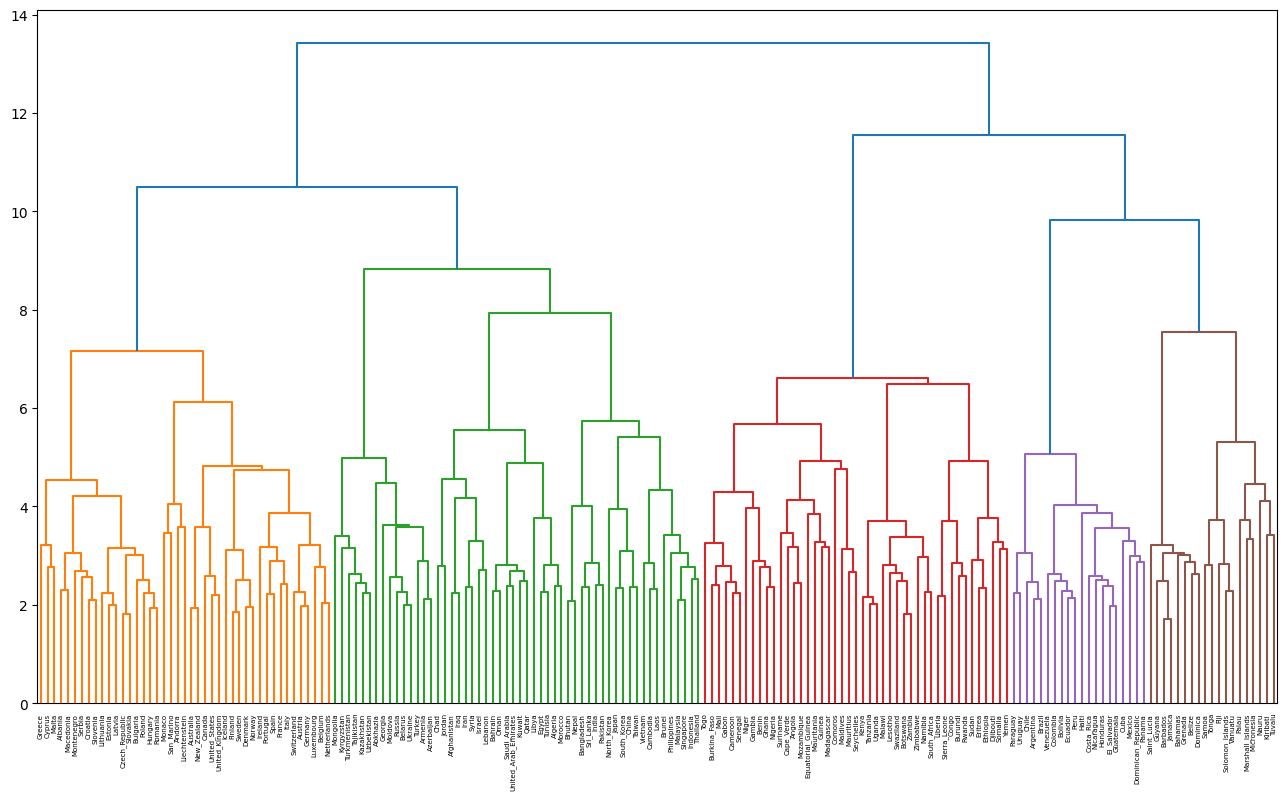

In [34]:
# Ward法で階層クラスタリング(標準化なしver)
from scipy.cluster.hierarchy import dendrogram, linkage

linkage_result = linkage(country_vec, method='ward')

plt.figure(figsize=(16, 9))
dendrogram(linkage_result, labels=countries)
plt.show()

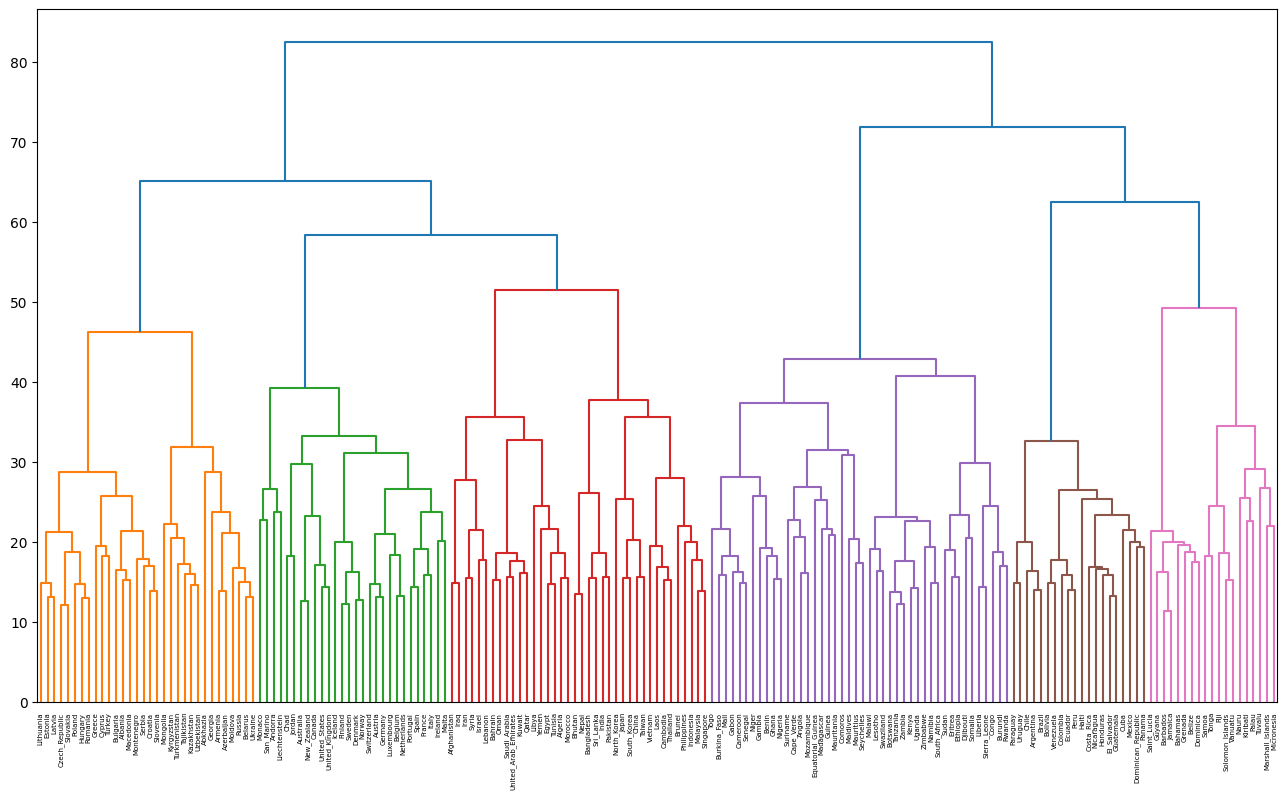

In [33]:
# Ward法で階層クラスタリング(標準化ありver)
from scipy.cluster.hierarchy import dendrogram, linkage

linkage_result = linkage(country_vec_scaled, method='ward')

plt.figure(figsize=(16, 9))
dendrogram(linkage_result, labels=countries)
plt.show()

## 59. t-SNEによる可視化

ベクトル空間上の国名に関する単語ベクトルをt-SNEで可視化せよ。

In [36]:
# t-SNE : 次元削減のアルゴリズム
from sklearn.manifold import TSNE

# t-SNEで単語ベクトルを2次元に
tsne = TSNE(n_components=2, # 構成次元
            random_state=0)

# 次元削減
country_vec_tsne = tsne.fit_transform(country_vec_scaled)
country_vec_tsne[0]

array([-1.0661011,  3.8487468], dtype=float32)

In [37]:
country_vec_tsne[0][0]

-1.0661011

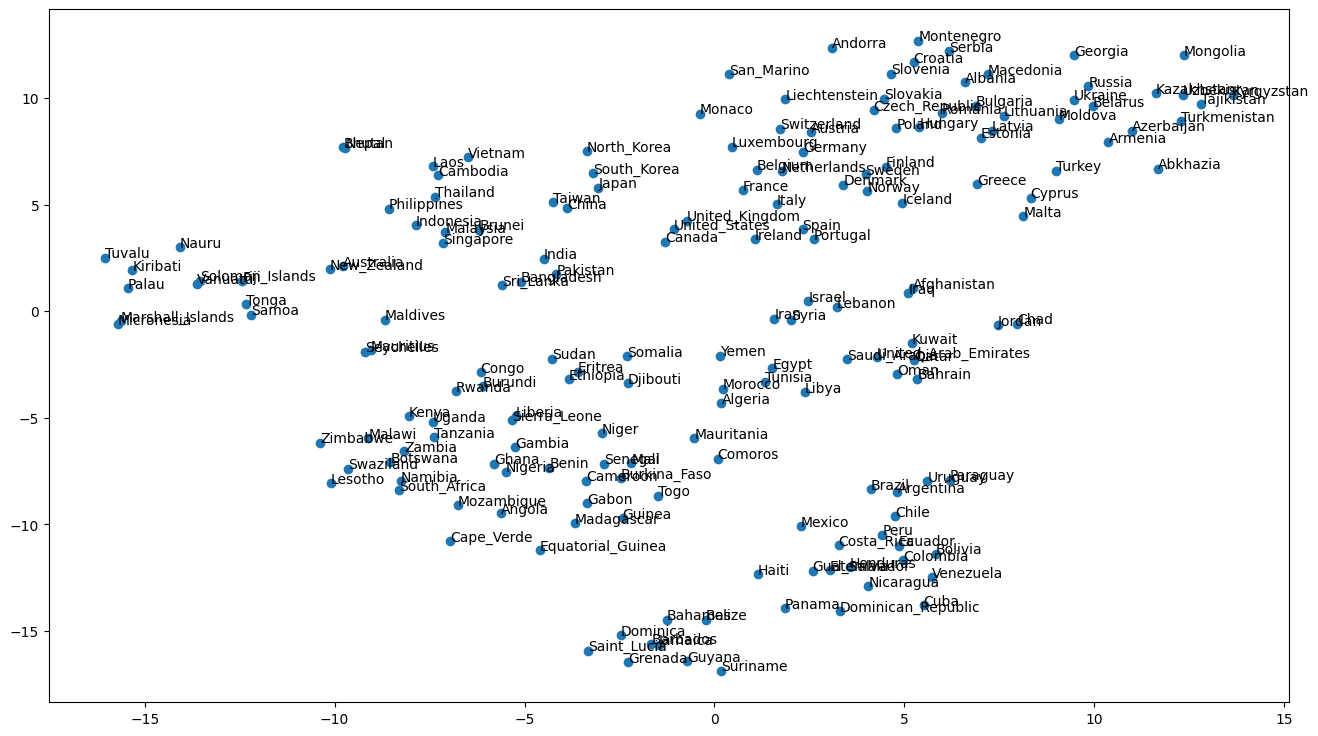

In [40]:
# 結果を可視化
plt.figure(figsize=(16, 9))
plt.scatter(country_vec_tsne[:, 0], country_vec_tsne[:, 1])

# 国名も表示
for i, country in enumerate(countries):
    # 点と国名をセットに
    plt.annotate(country, (country_vec_tsne[i, 0], country_vec_tsne[i, 1]))
plt.show()

参考：https://colab.research.google.com/github/satoyoshiharu/nlp/blob/main/Word_Vector.ipynb